# EvaCar

## 5. Data understanding

### 5.1. Exploratory Data Analysis

In [47]:
# Import necessary libraries, packages, and modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from sklearn.preprocessing import LabelEncoder

In [48]:
# Load data and create dataframe
df = pd.read_csv(f"../datasets/ProcessedDataDB-24-04-10.csv")
df = df.drop(["Unnamed: 0"], axis=1)

In [49]:
# Define function for display Bar charts
def plot_barchar_data(dataset, x_data, y_data, char_title, x_label, y_label):
    """
    Plot Seaborn Bar Char.
    """
    # Plot Top 10 model by number of cars
    plt.figure(figsize=(10, 6))
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(x_label, fontsize=16);
    plt.ylabel(y_label, fontsize=16);
    plt.title(char_title, fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=12)

    ax = sns.barplot(
        x=x_data, 
        y=y_data, 
        data=dataset,
        estimator=sum, 
        errorbar=None, 
        color='#69b3a2'
    )
    sns.despine(bottom = False, left = False)
    sns.set_theme(style='white')
    for i in ax.containers:
        ax.bar_label(i,)


# Define function for display Histogram charts
def plot_histogram_data(dataset, x_data, value_range, char_title, x_label, y_label):
    """
    Plot Seaborn Hisotgram Char.
    """
    plt.figure(figsize=(10, 6))
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(x_label, fontsize=16);
    plt.ylabel(y_label, fontsize=16);
    plt.title(char_title, fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=12)

    sns.despine(bottom = False, left = False)
    sns.set_theme(style='white')
    ax = sns.histplot(
        data=dataset, 
        x=x_data,
        binwidth=value_range, 
        color='#69b3a2'
    )
    for i in ax.containers:
        ax.bar_label(i,)

In [50]:
# 1. How many cars are used in the analyze?
no_analyzed_cars = df.shape[0]
print(f"Number of cars used in current analyze is equal to {no_analyzed_cars} cars.")

Number of cars used in current analyze is equal to 43247 cars.


In [51]:
# 2.1. Which is the most expensive car?
expensive_car = df.loc[df['price'] == df['price'].max()]
print(f"The most expensive car in current analyze is {expensive_car.iloc[0,0]} {expensive_car.iloc[0,1]} that costs {expensive_car.iloc[0,9]} Euro.")

The most expensive car in current analyze is Mercedes-Benz GLE that costs 9000000 Euro.


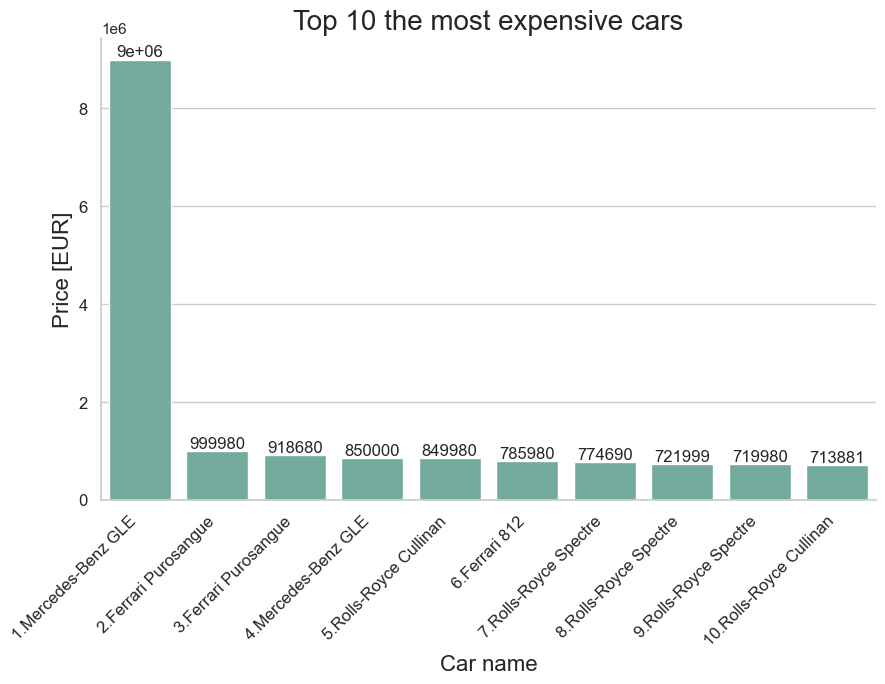

In [52]:
# 2.1.1. Plot 10 most expensive cars
top_10_cars = df.sort_values(by="price", ascending=False).head(10)
top_10_names = []
for index in range(10):
    top_10_names.append(f"{index+1}.{top_10_cars['manufacturer'].iloc[index]} {top_10_cars['model'].iloc[index]}")
top_10_cars["names"] = top_10_names

plot_barchar_data(top_10_cars, "names", "price", 'Top 10 the most expensive cars', 'Car name', 'Price [EUR]')

In [53]:
# 2.2. Which is the cheapest car?
cheap_car = df.loc[df['price'] == df['price'].min()]
print(f"The cheapest car in current analyze is {cheap_car.iloc[0,0]} {cheap_car.iloc[0,1]} that costs {cheap_car.iloc[0,9]} Euro.")

The cheapest car in current analyze is BMW Seria 3 that costs 10 Euro.


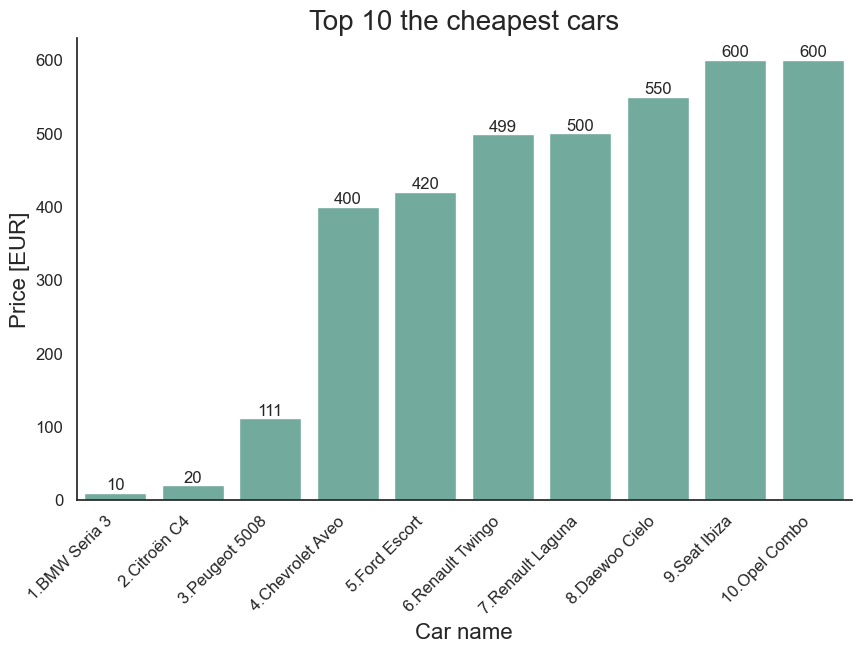

In [54]:
# 2.2.1. Plot 10 cheapest cars
bottom_10_cars = df.sort_values(by="price", ascending=True).head(10)
bottom_10_names = []
for index in range(10):
    bottom_10_names.append(f"{index+1}.{bottom_10_cars['manufacturer'].iloc[index]} {bottom_10_cars['model'].iloc[index]}")
bottom_10_cars["names"] = bottom_10_names

plot_barchar_data(bottom_10_cars, "names", "price", 'Top 10 the cheapest cars', 'Car name', 'Price [EUR]')


In [55]:
# 3.1. Which manufacturer has more cars?
more_manufact_no_cars = df['manufacturer'].value_counts().iloc[0]
more_manufact_name = df['manufacturer'].mode().iloc[0]
print(f"Manufacturer with most cars is {more_manufact_name} with {more_manufact_no_cars} cars.")

Manufacturer with most cars is BMW with 5610 cars.


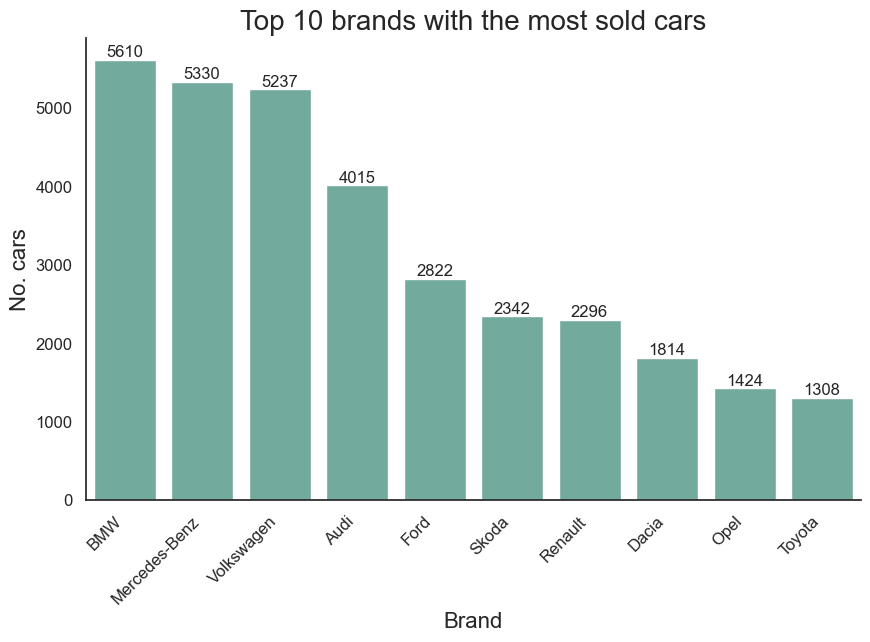

In [56]:
# 3.1.1. Plot 10 manufacturer with the most cars
count_10_manufact = pd.DataFrame()
count_10_manufact["count"] = df["manufacturer"].value_counts().sort_values(ascending=False).head(10)
count_10_manufact["names"] = count_10_manufact.index[:].to_list()

plot_barchar_data(count_10_manufact, "names", "count", 'Top 10 brands with the most sold cars', 'Brand', 'No. cars')

In [57]:
# 3.2. Which model has more cars?
more_model_no_cars = df['model'].value_counts().iloc[0]
more_model_name = df['model'].mode().iloc[0]
print(f"The most cars are of model {more_model_name} with {more_model_no_cars} cars.")

The most cars are of model Passat with 1338 cars.


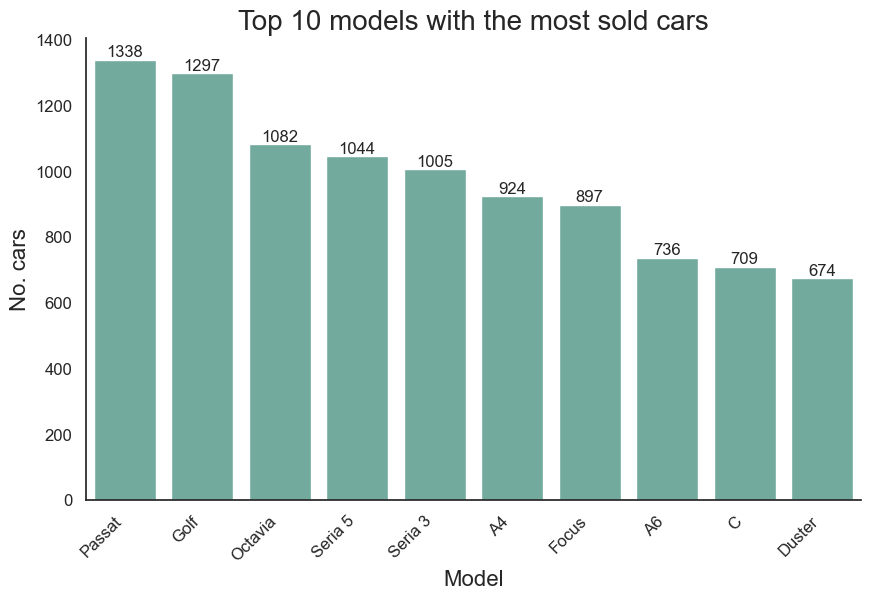

In [58]:
# 3.2.1. Plot 10 model with the most cars
count_10_model = pd.DataFrame()
count_10_model["count"] = df["model"].value_counts().sort_values(ascending=False).head(10)
count_10_model["names"] = count_10_model.index[:].to_list()

plot_barchar_data(count_10_model, "names", "count", 'Top 10 models with the most sold cars', 'Model', 'No. cars')

In [59]:
# 3.3. Which manufacturer has less cars?
manufact_no_cars = df['manufacturer'].value_counts().min()
manufact_name = df['manufacturer'].value_counts().idxmin()
print(f"Manufacturer with the fewest cars is {manufact_name} with {manufact_no_cars} cars.")

Manufacturer with the fewest cars is Excalibur with 1 cars.


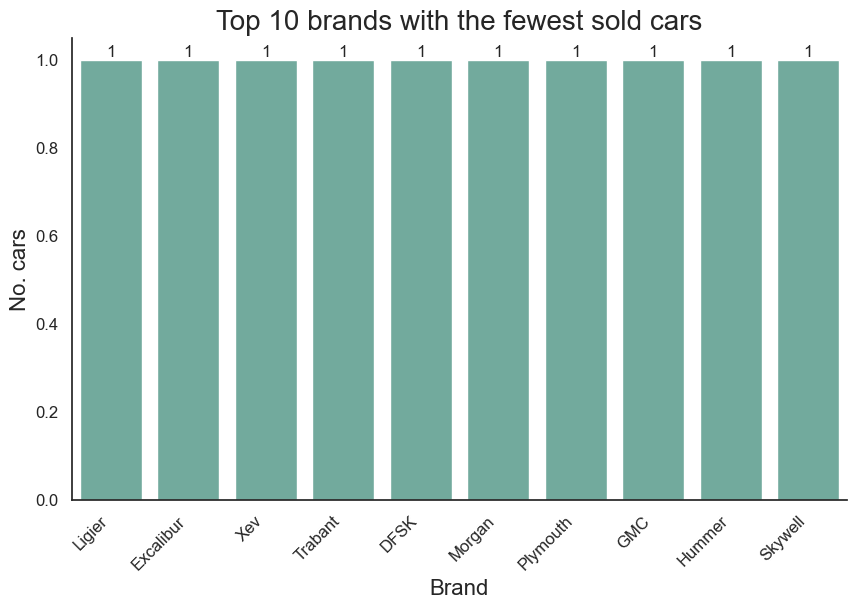

In [60]:
# 3.3.1. Plot 10 manufacturer with fewest cars
count_10_manufact = pd.DataFrame()
count_10_manufact["count"] = df["manufacturer"].value_counts().sort_values(ascending=True).head(10)
count_10_manufact["names"] = count_10_manufact.index[:].to_list()

plot_barchar_data(count_10_manufact, "names", "count", 'Top 10 brands with the fewest sold cars', 'Brand', 'No. cars')

In [61]:
# 3.4. Which model has less cars?
model_no_cars = df['model'].value_counts().min()
model_name = df['model'].value_counts().idxmin()
print(f"Model with fewest cars is {model_name} with {model_no_cars} cars.")

Model with fewest cars is Sequoia with 1 cars.


In [62]:
# 4.1. Which manufacturer is the most expensive at average?
expensive_avg_price_per_manufact = df.groupby('manufacturer')['price'].mean().sort_values(ascending=False)
print(f"The most expensive manufacturer at average is {expensive_avg_price_per_manufact.index[0]} with average price of {expensive_avg_price_per_manufact.iloc[0]} EUR/car.")

The most expensive manufacturer at average is Rolls-Royce with average price of 451693.8484848485 EUR/car.


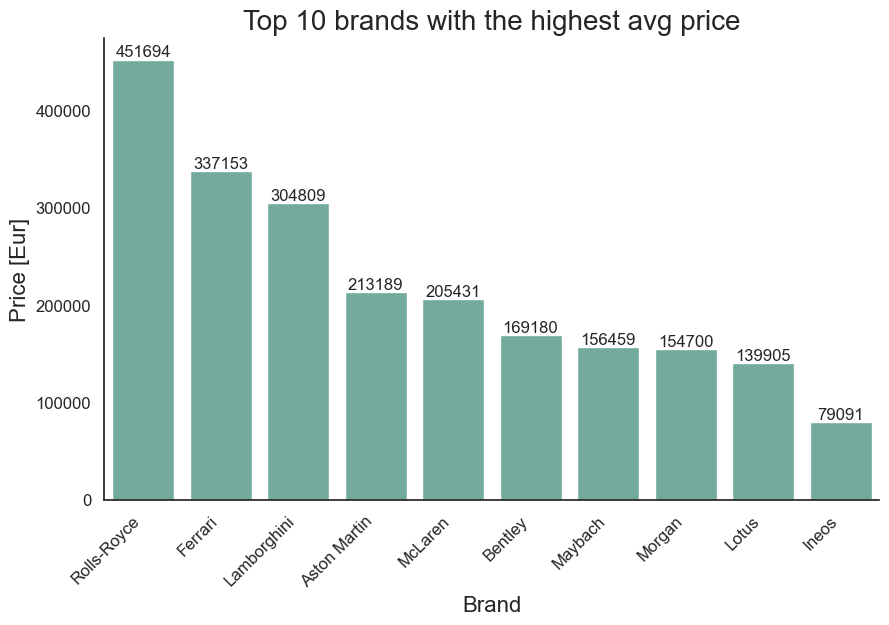

In [63]:
# 4.1.1. Plot 10 the most expensive at average manufacturer
top_avg_price_manufact = pd.DataFrame()
top_avg_price_manufact["price"] = df.groupby('manufacturer')['price'].mean().sort_values(ascending=False).head(10)
top_avg_price_manufact["names"] = top_avg_price_manufact.index[:].to_list()

plot_barchar_data(top_avg_price_manufact, "names", "price", 'Top 10 brands with the highest avg price', 'Brand', 'Price [Eur]')

In [64]:
# 4.2. Which model is the most expensive at average?
expensive_avg_price_per_model = df.groupby('model')['price'].mean().sort_values(ascending=False)
print(f"The most expensive model at average is {expensive_avg_price_per_model.index[0]} with average price of {expensive_avg_price_per_model.iloc[0]} EUR/car.")

The most expensive model at average is Purosangue with average price of 959330.0 EUR/car.


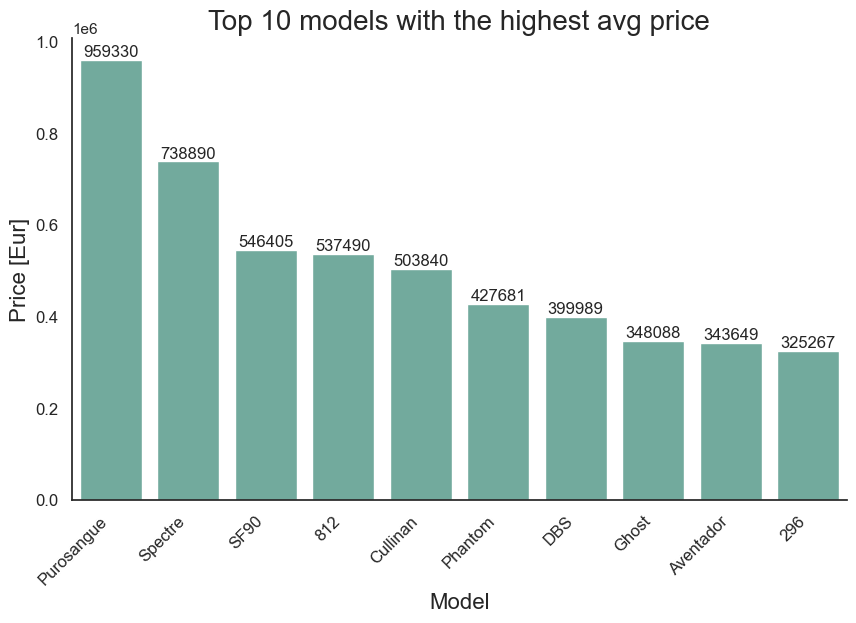

In [65]:
# 4.2.1. Plot 10 the most expensive at average model
top_avg_price_model = pd.DataFrame()
top_avg_price_model["price"] = df.groupby('model')['price'].mean().sort_values(ascending=False).head(10)
top_avg_price_model["names"] = top_avg_price_model.index[:].to_list()

plot_barchar_data(top_avg_price_model, "names", "price", 'Top 10 models with the highest avg price', 'Model', 'Price [Eur]')

In [66]:
# 4.3. Which manufacturer is most cheap at average?
cheap_avg_price_per_manufact = df.groupby('manufacturer')['price'].mean().sort_values(ascending=True)
print(f"The cheapest manufacturer at average is {cheap_avg_price_per_manufact.index[0]} with average price of {cheap_avg_price_per_manufact.iloc[0]} EUR/car.")

The cheapest manufacturer at average is Daewoo with average price of 1938.0 EUR/car.


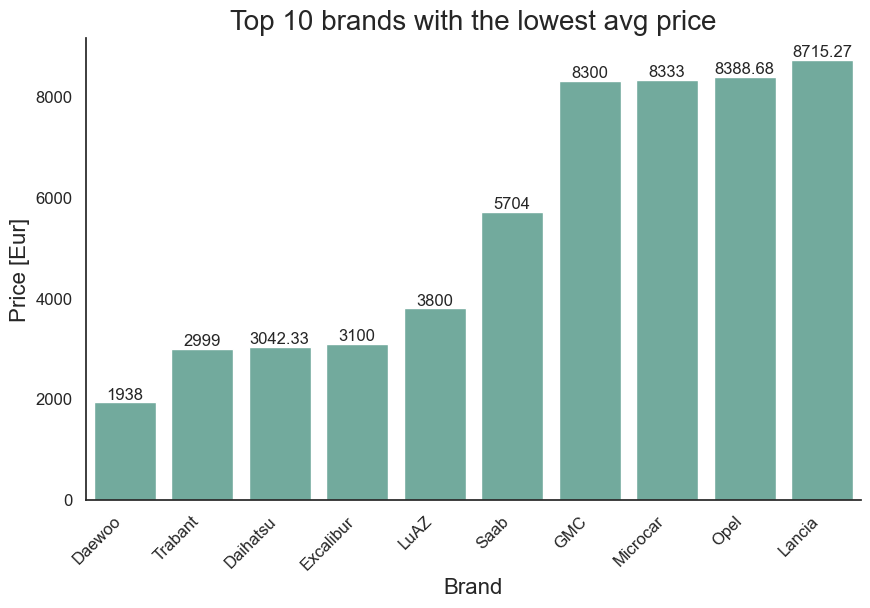

In [67]:
# 4.3.1. Plot 10 the cheapest at average manufacturer
bottom_avg_price_manufact = pd.DataFrame()
bottom_avg_price_manufact["price"] = df.groupby('manufacturer')['price'].mean().sort_values(ascending=True).head(10)
bottom_avg_price_manufact["names"] = bottom_avg_price_manufact.index[:].to_list()

plot_barchar_data(bottom_avg_price_manufact, "names", "price", 'Top 10 brands with the lowest avg price', 'Brand', 'Price [Eur]')

In [68]:
# 4.4. Which model is most cheap at average?
cheap_avg_price_per_model = df.groupby('model')['price'].mean().sort_values(ascending=True)
print(f"The cheapest model at average is {cheap_avg_price_per_model.index[0]} with average price of {cheap_avg_price_per_model.iloc[0]} EUR/car.")

The cheapest model at average is Escort with average price of 420.0 EUR/car.


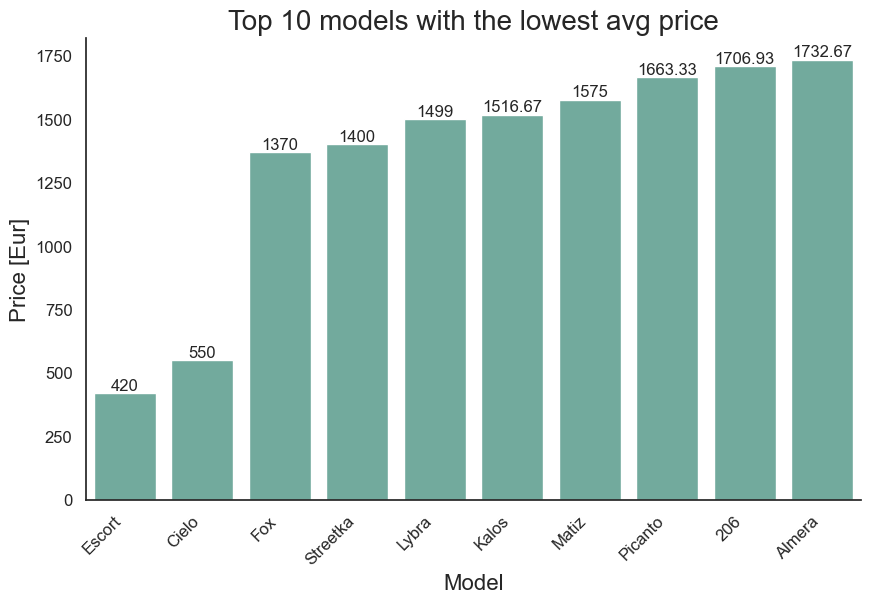

In [69]:
# 4.4.1. Plot 10 the cheapest at average model
bottom_avg_price_model = pd.DataFrame()
bottom_avg_price_model["price"] = df.groupby('model')['price'].mean().sort_values(ascending=True).head(10)
bottom_avg_price_model["names"] = bottom_avg_price_model.index[:].to_list()

plot_barchar_data(bottom_avg_price_model, "names", "price", 'Top 10 models with the lowest avg price', 'Model', 'Price [Eur]')

In [70]:
# 5.1. In which county are selling most cars?
county_max_cars = df['county'].value_counts()
print(f"The most cars are in {county_max_cars.idxmax()} county with {county_max_cars.max()} cars.")

The most cars are in Bucuresti county with 10078 cars.


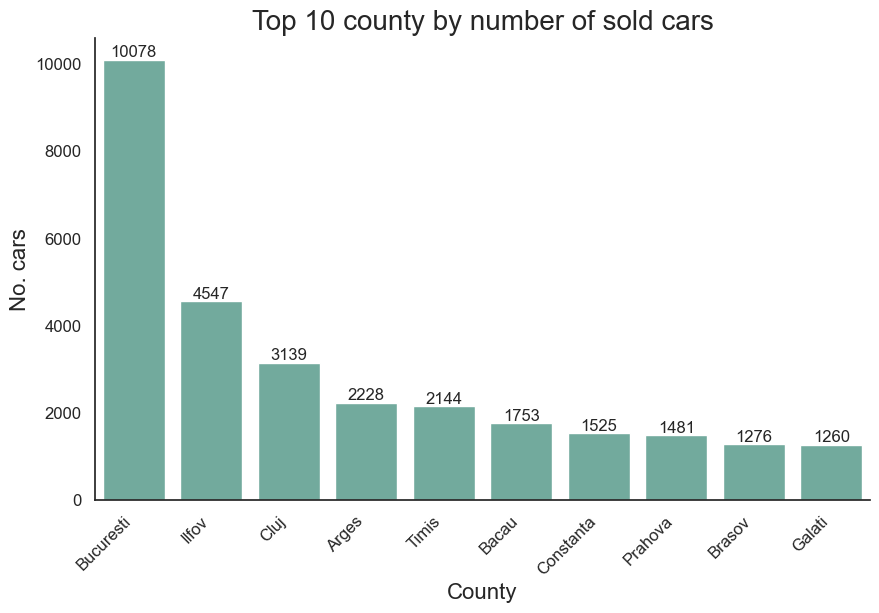

In [71]:
# 5.1.1. Plot 10 county with the most sold cars
county_max_cars = pd.DataFrame()
county_max_cars["count"] = df.value_counts("county").sort_values(ascending=False).head(10)
county_max_cars["names"] = county_max_cars.index[:].to_list()

plot_barchar_data(county_max_cars, "names", "count", 'Top 10 county by number of sold cars', 'County', 'No. cars')

In [72]:
# 5.2. In which city are selling most cars?
city_max_cars = df['city'].value_counts()
print(f"The most cars are in {city_max_cars.idxmax()} city with {city_max_cars.max()} cars.")

The most cars are in Bucuresti city with 10060 cars.


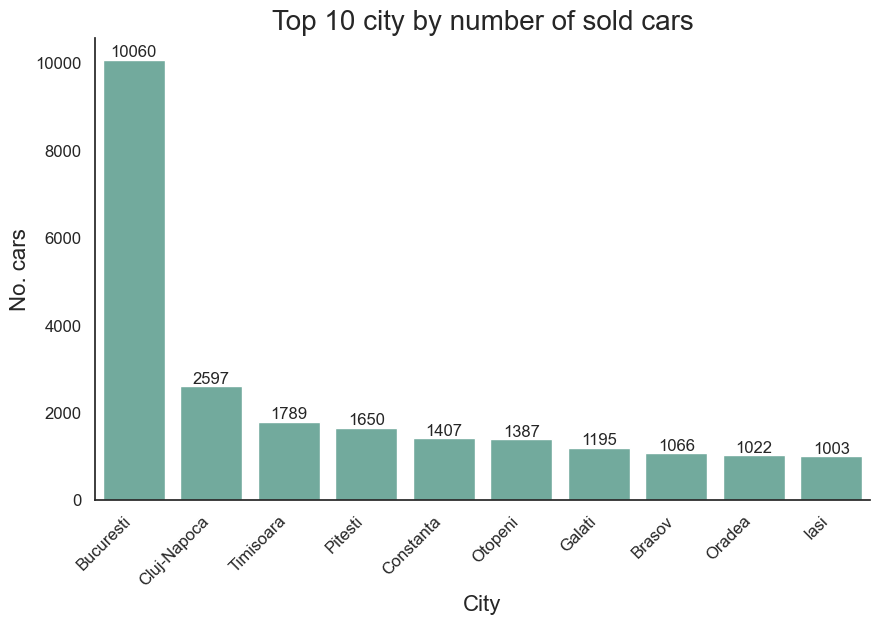

In [73]:
# 5.2.1. Plot 10 city with the most sold cars
city_max_cars = pd.DataFrame()
city_max_cars["count"] = df.value_counts("city").sort_values(ascending=False).head(10)
city_max_cars["names"] = city_max_cars.index[:].to_list()

plot_barchar_data(city_max_cars, "names", "count", 'Top 10 city by number of sold cars', 'City', 'No. cars')

In [74]:
# 6.1. Which type of fuel is the most selling?
fuel_max_count = df['fuel'].value_counts()
print(f"The most cars with total number of {fuel_max_count.max()} cars are used {fuel_max_count.idxmax()} fuel.")

The most cars with total number of 26795 cars are used Diesel fuel.


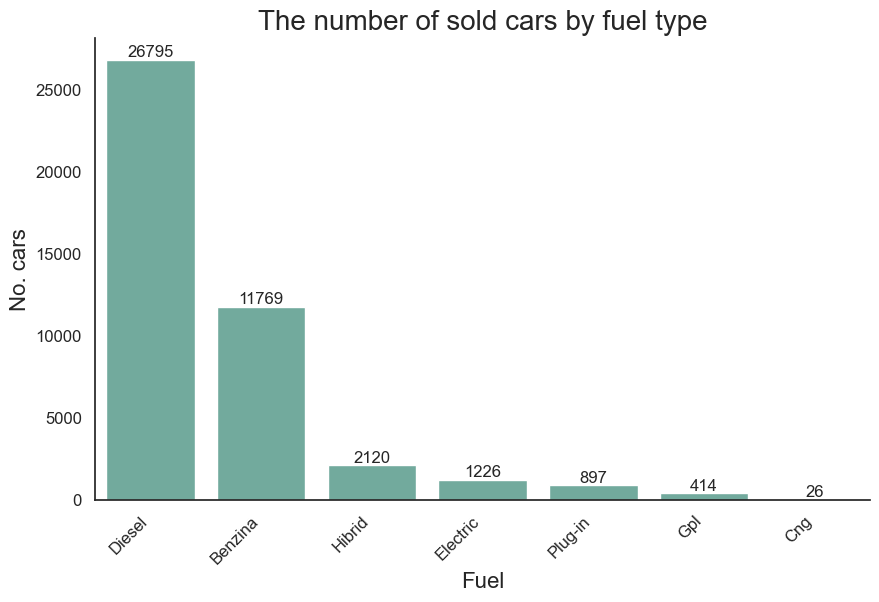

In [75]:
# 6.1.1. Plot the sold cars by fuel type
fuel_count = pd.DataFrame()
fuel_count["count"] = df.value_counts("fuel").sort_values(ascending=False).head(10)
fuel_count["names"] = fuel_count.index[:].to_list()

plot_barchar_data(fuel_count, "names", "count", 'The number of sold cars by fuel type', 'Fuel', 'No. cars')

In [76]:
# 6.2. Which type of fuel is the less selling?
fuel_min_count = df['fuel'].value_counts()
print(f"The fewest cars with total number of {fuel_min_count.min()} cars are used {fuel_min_count.idxmin()} fuel.")

The fewest cars with total number of 26 cars are used Cng fuel.


In [77]:
# 7.1. Which is the biggest engine capacity?
max_capacity = df[df['capacity'] == df['capacity'].max()]
print(f"The max engine capacity of {max_capacity['capacity'].iloc[0]} cm3 has {max_capacity['manufacturer'].iloc[0]} {max_capacity['model'].iloc[0]}.")

The max engine capacity of 8200 cm3 has Cadillac Eldorado.


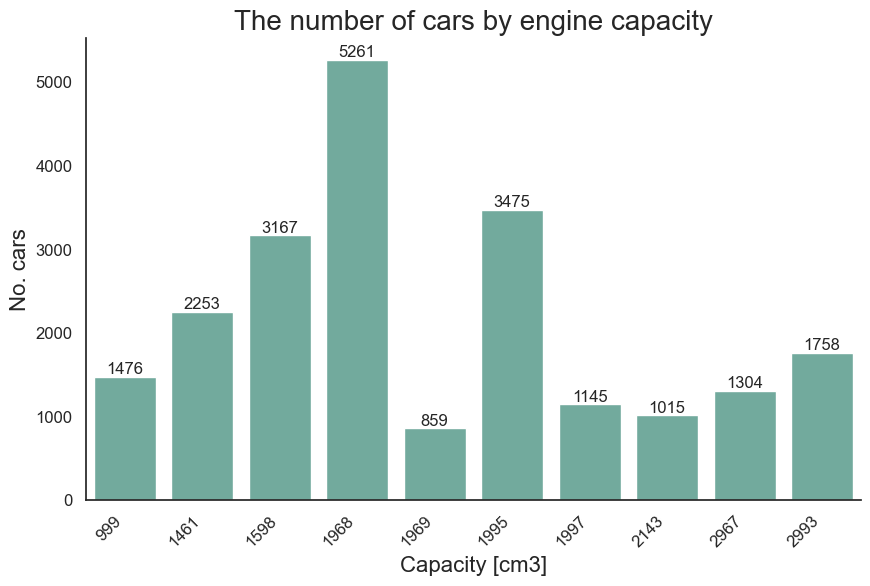

In [78]:
# 7.1.1. Plot the sold cars by engine capacity
capacity_count = pd.DataFrame()
capacity_count["count"] = df[df['capacity'] != 0]['capacity'].value_counts().sort_values(ascending=False).head(10)
capacity_count["capacity"] = capacity_count.index[:].to_list()

plot_barchar_data(capacity_count, "capacity", "count", 'The number of cars by engine capacity', 'Capacity [cm3]', 'No. cars')

In [79]:
# 7.2. Which is the smallest engine capacity?
df_non_0 = df.drop(df[df.capacity == 0].index)
min_capacity = df_non_0[df_non_0['capacity'] == df_non_0['capacity'].min()]
print(f"The min engine capacity of {min_capacity['capacity'].iloc[0]} cm3 has {min_capacity['manufacturer'].iloc[0]} {min_capacity['model'].iloc[0]}.")

The min engine capacity of 400 cm3 has Opel Vectra.


In [80]:
# 8.1. Which is the biggest milleage?
max_mileage = df[df['mileage'] == df['mileage'].max()]
print(f"The max mileage of {max_mileage['mileage'].iloc[0]} KM has {max_mileage['manufacturer'].iloc[0]} {max_mileage['model'].iloc[0]}.")

The max mileage of 3000000 KM has Volvo S60.


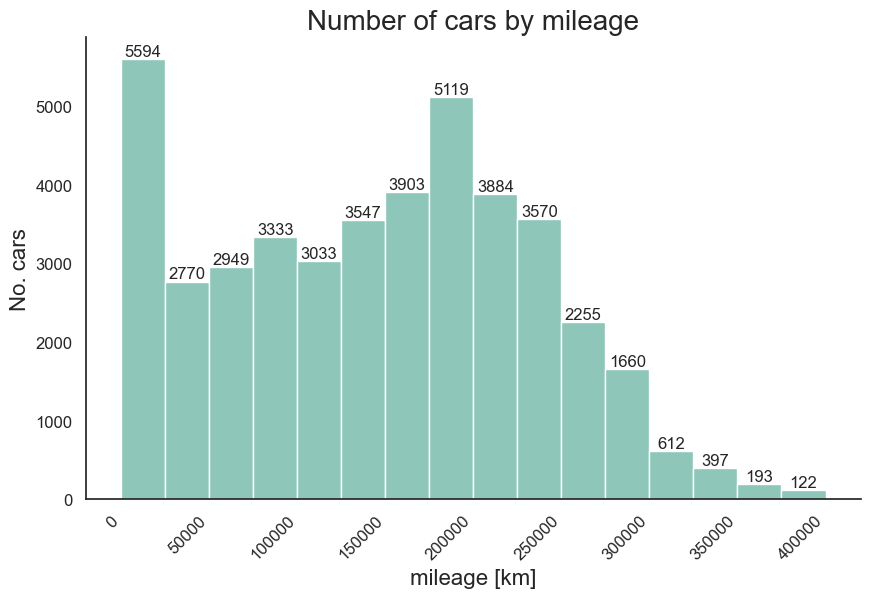

In [81]:
# 8.1.1. Plot mileage
mileage_plot = df.drop(df[(df.mileage > 400000) | (df.mileage == 0)].index)

plot_histogram_data(mileage_plot, "mileage", 25000, "Number of cars by mileage", "mileage [km]", "No. cars")

In [82]:
# 8.2. Which is the smallest milleage?
df.drop(df[df.mileage == 0].index)
min_mileage = df[df['mileage'] == df['mileage'].min()]
print(f"The min mileage of {min_mileage['mileage'].iloc[0]} KM has {min_mileage['manufacturer'].iloc[0]} {min_mileage['model'].iloc[0]}.")

The min mileage of 0 KM has Alfa Romeo Tonale.


In [83]:
# 9.1. Which is the biggest power?
max_power = df[df['power'] == df['power'].max()]
print(f"The max power of {max_power['power'].iloc[0]} HP has {max_power['manufacturer'].iloc[0]} {max_power['model'].iloc[0]}.")

The max power of 9560 HP has Ford Tourneo.


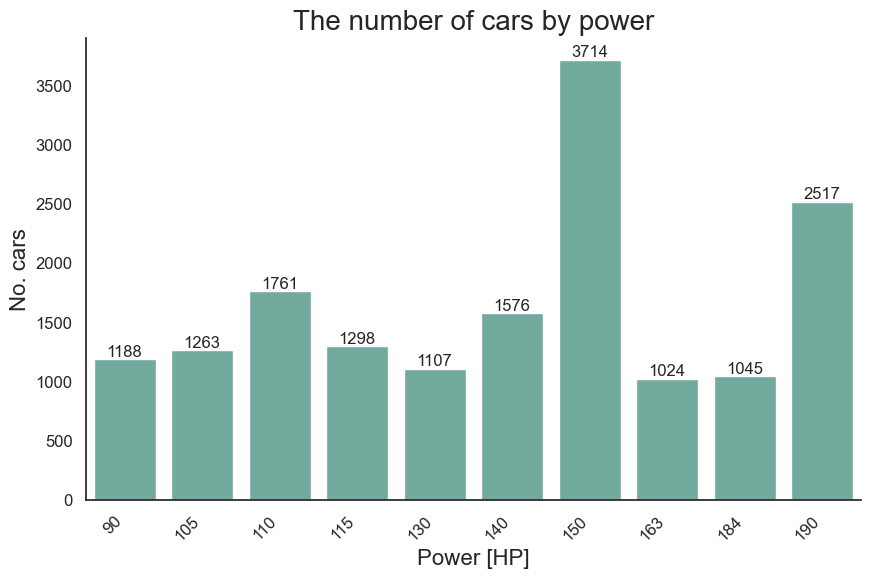

In [84]:
# 9.1.1. Plot the sold cars by power
power_count = pd.DataFrame()
power_count["count"] = df[df['power'] != 0]['power'].value_counts().sort_values(ascending=False).head(10)
power_count["power"] = power_count.index[:].to_list()

plot_barchar_data(power_count, "power", "count", 'The number of cars by power', 'Power [HP]', 'No. cars')

In [85]:
# 9.2. Which is the smallest power?
df_non_0 = df.drop(df[df.power == 0].index)
min_power = df_non_0[df_non_0['power'] == df_non_0['power'].min()]
print(f"The min power of {min_power['power'].iloc[0]} HP has {min_power['manufacturer'].iloc[0]} {min_power['model'].iloc[0]}.")

The min power of 3 HP has Altul Altul.


In [86]:
# 10. How many cars are manufactured in current year?
current_year = datetime.now().year
current_year_no_cars = df[df['year'] == 2024].shape[0]
print(f"Number of cars that were manufactured in 2024 is {current_year_no_cars}.")

Number of cars that were manufactured in 2024 is 839.


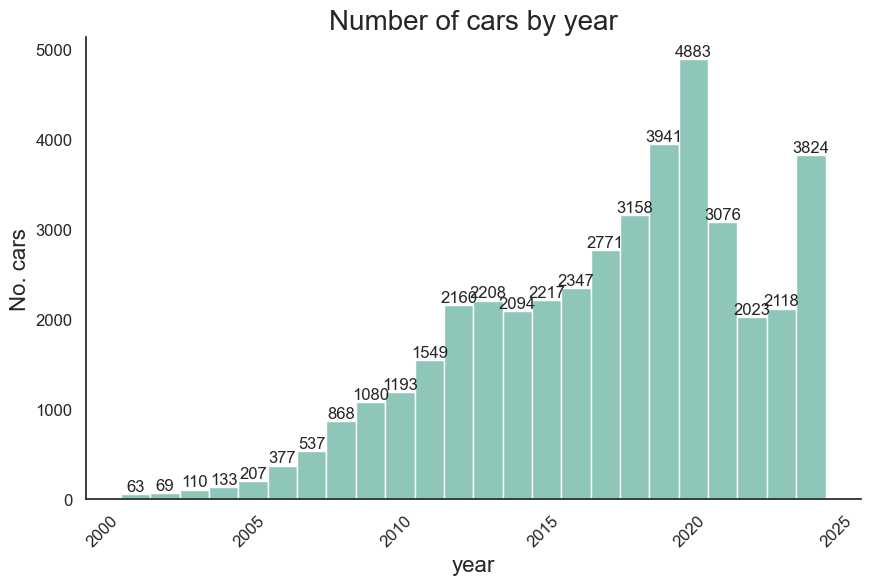

In [87]:
# 10.1. Plot year
year_plot = df.drop(df[(df.year < 2000) | (df.year == 0)].index)

plot_histogram_data(year_plot, "year", 1, "Number of cars by year", "year", "No. cars")

In [88]:
# 11.1. How the feature influence each other?
label_encoder = LabelEncoder()
encoded_columns = ['manufacturer', 'model', 'fuel', 'city', 'county']
for column in encoded_columns:
    df[column] = label_encoder.fit_transform(df[column])

df.corr()

,manufacturer,model,mileage,capacity,power,year,fuel,county,city,price
manufacturer,1.000000,-0.024935,0.016646,-0.176011,-0.167757,-0.030595,0.011145,0.026737,0.014733,-0.039092
model,-0.024935,1.000000,0.029844,0.115299,0.112581,0.033934,0.075174,0.003237,0.003138,0.028550
mileage,0.016646,0.029844,1.000000,0.074769,-0.221807,-0.636956,0.028760,0.009891,0.055339,-0.276806
capacity,-0.176011,0.115299,0.074769,1.000000,0.584355,-0.055308,0.006146,-0.004278,-0.028860,0.280747
power,-0.167757,0.112581,-0.221807,0.584355,1.000000,0.252486,-0.001652,-0.005426,-0.040247,0.414828
year,-0.030595,0.033934,-0.636956,-0.055308,0.252486,1.000000,0.129327,-0.016076,-0.036899,0.275584
fuel,0.011145,0.075174,0.028760,0.006146,-0.001652,0.129327,1.000000,0.005678,0.004660,0.013298
county,0.026737,0.003237,0.009891,-0.004278,-0.005426,-0.016076,0.005678,1.000000,0.544453,0.001335
city,0.014733,0.003138,0.055339,-0.028860,-0.040247,-0.036899,0.004660,0.544453,1.000000,-0.026913
price,-0.039092,0.028550,-0.276806,0.280747,0.414828,0.275584,0.013298,0.001335,-0.026913,1.000000


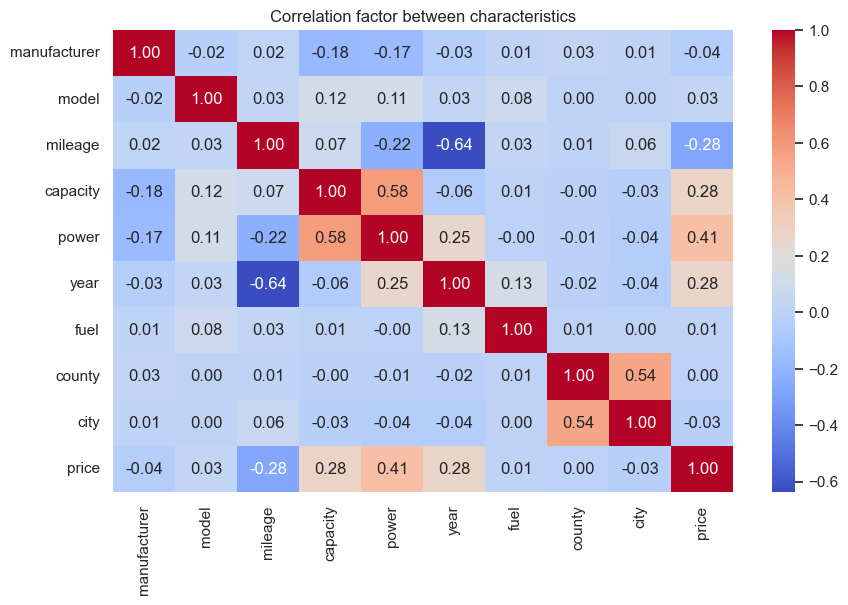

In [89]:
# 11.1.1. Plot Heatmap of the features
label_encoder = LabelEncoder()
encoded_columns = ['manufacturer', 'model', 'fuel', 'city', 'county']
for column in encoded_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Creating a heatmap
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation factor between characteristics")
plt.show()

In [90]:
# 11.2. How the feature influence each other?
important_columns = df.drop(['manufacturer', 'model', 'city', 'county', 'fuel'], axis=1).corr()
important_columns

,mileage,capacity,power,year,price
mileage,1.000000,0.074769,-0.221807,-0.636956,-0.276806
capacity,0.074769,1.000000,0.584355,-0.055308,0.280747
power,-0.221807,0.584355,1.000000,0.252486,0.414828
year,-0.636956,-0.055308,0.252486,1.000000,0.275584
price,-0.276806,0.280747,0.414828,0.275584,1.000000


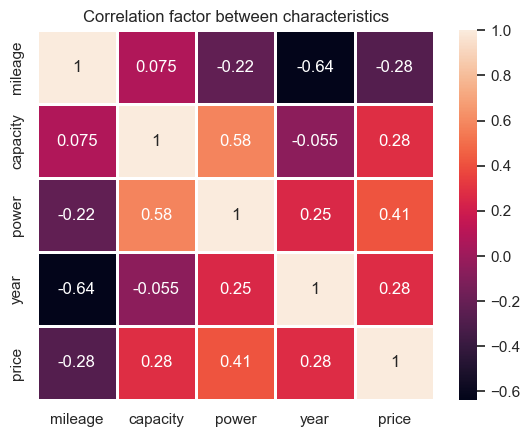

In [91]:
# 11.2.1. Plot Heatmap of the features
important_columns = df.drop(['manufacturer', 'model', 'city', 'county', 'fuel'], axis=1).corr()

sns.set(style="whitegrid")
ax=sns.heatmap(important_columns, 
            linewidth=2,
            annot=True)
ax.set_title("Correlation factor between characteristics")
plt.show()

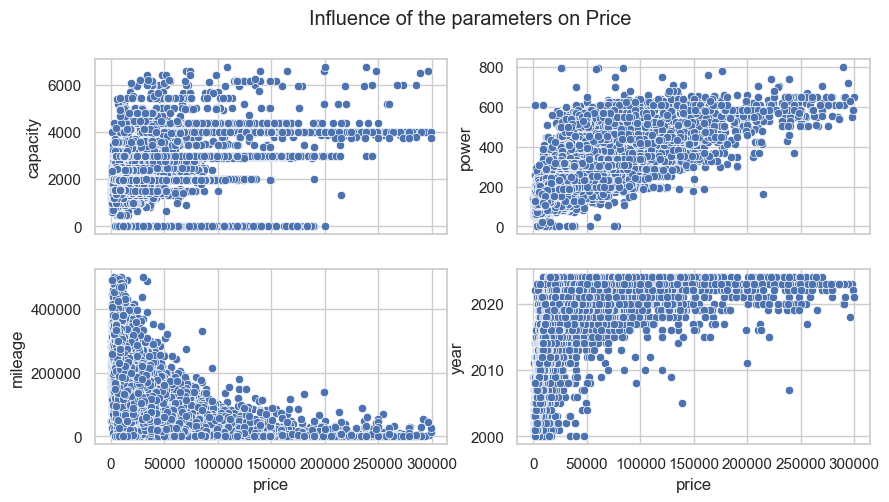

In [92]:
# 11.2.2. Plot correlation of the features
correlation_df = df.drop(df[(df.price > 300000) | (df.price == 0) | (df.mileage > 500000) | (df.power > 800) | (df.year < 2000)].index)

fig, axes = plt.subplots(2, 2, sharex=True, figsize=(10, 5))
fig.suptitle('Influence of the parameters on Price')

sns.scatterplot(data=correlation_df, x='price', y='capacity', ax=axes[0,0])
sns.scatterplot(data=correlation_df, x='price', y='power', ax=axes[0,1])
sns.scatterplot(data=correlation_df, x='price', y='mileage', ax=axes[1,0])
sns.scatterplot(data=correlation_df, x='price', y='year', ax=axes[1,1])
plt.show()